<a href="https://colab.research.google.com/github/marcusazevedo/data_science_projects/blob/main/Projeto_1_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Austin - Texas*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Austin, localizada no estado do Texas, e ver quais insights podem ser extraídos a partir de dados brutos.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Obtenção dos Dados


In [5]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Austin_Airbnb_Dataset.csv')

In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

## Análise dos Dados


**Dicionário das variáveis**

* id: id na AirBnb
* name: Nome ou título do anúncio
* host_id: ID do proprietário
* host_name: Nome do proprietário
* neighbourhood_group: O grupo de bairros é geocodificado usando latitude e longitude em relação aos bairros definidos por shapefiles digitais abertos ou públicos.
* neighbourhood: Código do bairro
* latitude: Latitude do imóvel
* longitude: Longitude do imóvel
* room_type: Tipo de acomodação
* price: Preço da acomodação
* minimum_nights: Noites mínimas para reserva
* number_of_reviews: Números de avaliações
* last_review: Data da última avaliação
* reviews_per_month: Quantidade média de avaliações por mês
* calculated_host_listings_count: O número de anúncios que o anfitrião na cidade/região.
* availability_365: Disponibilidade da acomodação nos últimos 365 dias
* number_of_reviews_ltm: O número de avaliações que o anúncio recebeu (nos últimos 12 meses)
* license: O número da licença/autorização/registo

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [7]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,111.0,2,689,2024-07-28,3.65,1,332,34,NaN
1,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,NaN,1,299,2024-06-09,1.70,1,0,8,NaN
2,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,NaN,30,121,2024-07-01,0.67,1,0,1,NaN
3,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,NaN,78704,30.26034,-97.76487,Entire home/apt,159.0,3,325,2024-07-07,2.05,1,198,23,NaN
4,8502,Woodland Studio Lodging,25298,Karen,NaN,78741,30.23466,-97.73682,Entire home/apt,48.0,4,53,2024-04-14,0.30,1,121,2,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [9]:
# identificar o volume de dados do DataFrame
print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}\n")

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 15244
Variáveis:	 18



,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,float64
neighbourhood,int64
latitude,float64
longitude,float64
room_type,object
price,float64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [49]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False).round(2)

,0
license,100.00
neighbourhood_group,100.00
price,26.64
last_review,20.07
reviews_per_month,20.07
host_name,0.01
host_id,0.00
neighbourhood,0.00
latitude,0.00
longitude,0.00


### **Q3. Qual o tipo de distribuição das variáveis?**

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'neighbourhood_group'}>,
        <Axes: title={'center': 'neighbourhood'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>],
       [<Axes: title={'center': 'number_of_reviews_ltm'}>,
        <Axes: title={'center': 'license'}>, <Axes: >, <Axes: >]],
      dtype=object)

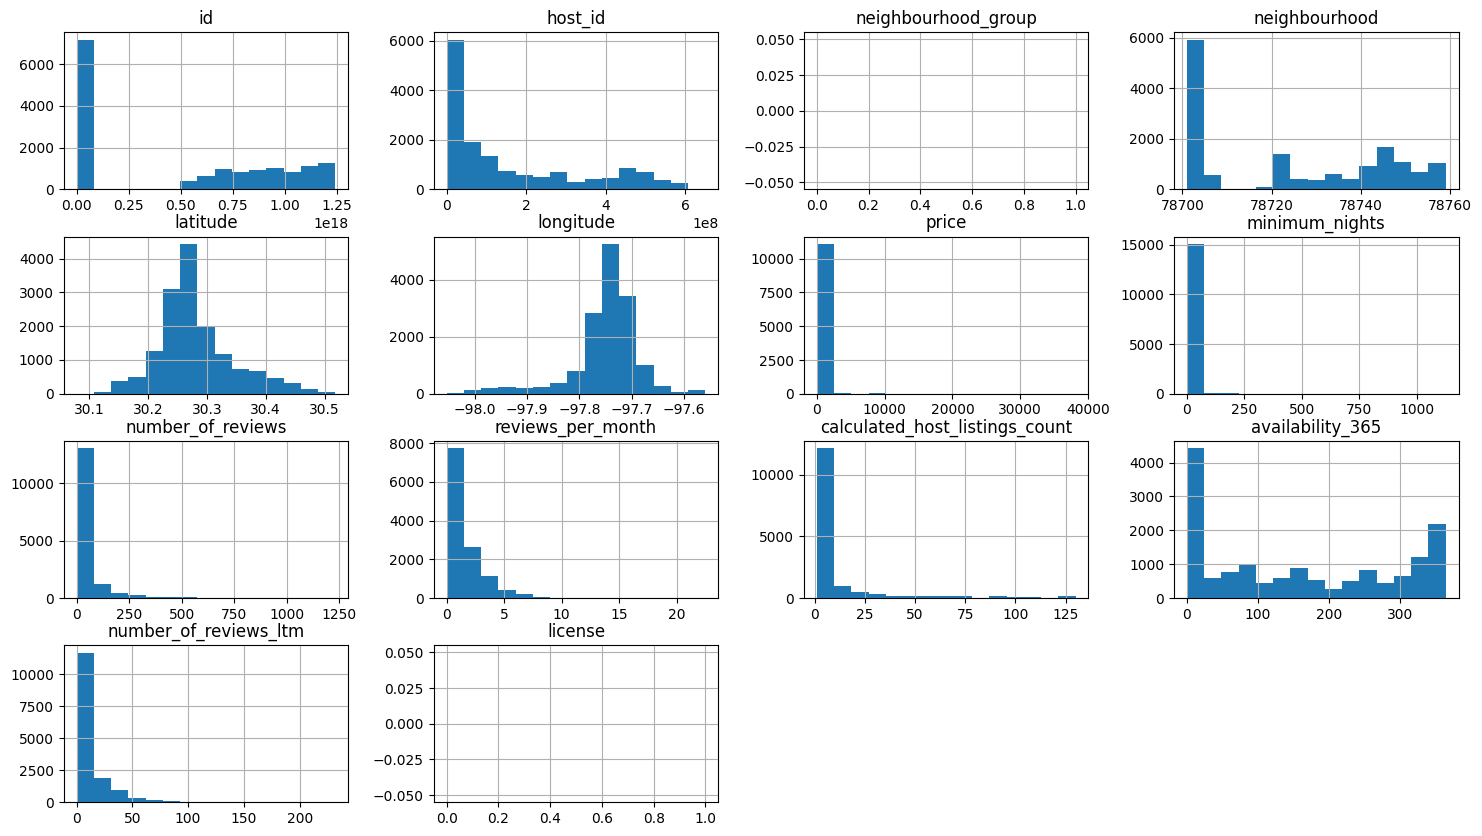

In [14]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15, figsize=(18, 10))

### **Q4. Qual a média dos preços de aluguel?**

In [16]:
# ver a média da coluna `price``
df['price'].mean().round(2)

282.15

### **Q4. Qual a correlação existente entre as variáveis**

In [23]:
# criar uma matriz de correlação
df_numeric = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']]

corr = df_numeric.corr()

# mostrar a matriz de correlação
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.040597,-0.060863,-0.114541,0.031763,0.087335,-0.091387
minimum_nights,-0.040597,1.000000,-0.066162,-0.114105,0.013434,0.042248,-0.109075
number_of_reviews,-0.060863,-0.066162,1.000000,0.607799,-0.063950,0.065243,0.641051
reviews_per_month,-0.114541,-0.114105,0.607799,1.000000,0.015524,0.180060,0.863261
calculated_host_listings_count,0.031763,0.013434,-0.063950,0.015524,1.000000,0.308610,-0.016359
availability_365,0.087335,0.042248,0.065243,0.180060,0.308610,1.000000,0.152563
number_of_reviews_ltm,-0.091387,-0.109075,0.641051,0.863261,-0.016359,0.152563,1.000000


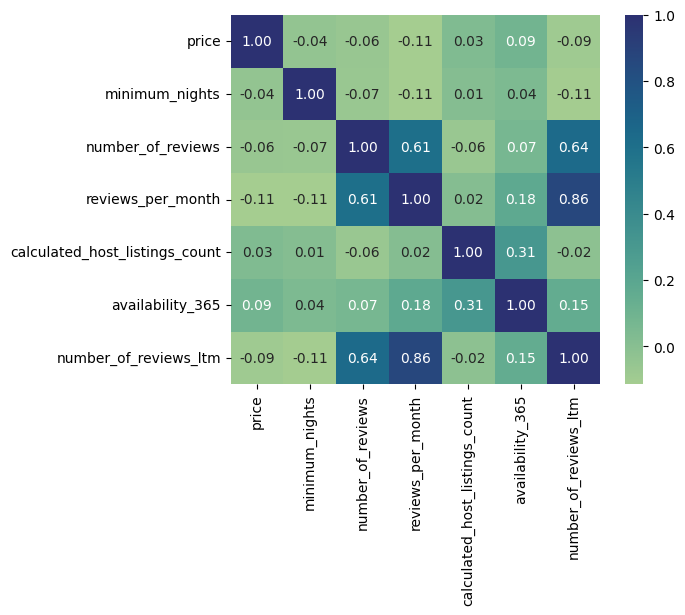

In [28]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='crest', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [29]:
# mostrar a quantidade de cada tipo de imóvel disponível
df['room_type'].value_counts()

,count
room_type,
Entire home/apt,12429
Private room,2562
Hotel room,134
Shared room,119


In [31]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df['room_type'].value_counts() / df.shape[0] * 100).round(2)

,count
room_type,
Entire home/apt,81.53
Private room,16.81
Hotel room,0.88
Shared room,0.78


### **Q6. Qual a localidade mais cara do dataset?**



In [37]:
# ver preços por bairros, na média
df.groupby('neighbourhood')['price'].mean().round(2).head(10)

,price
neighbourhood,
78701,396.42
78702,264.87
78703,322.03
78704,271.42
78705,126.01
78712,NaN
78717,141.12
78719,105.36
78721,180.02


In [47]:
import plotly.express as px

# plotar os imóveis pela latitude-longitude
fig = px.scatter_geo(df, lat = 'latitude', lon = 'longitude', locationmode='USA-states')

fig.update_layout(
        title = 'Austin-TX / AirBnb',
        geo_scope='usa',
    )

fig.show()

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [48]:
# ver a média da coluna `minimum_nights``
df['minimum_nights'].mean().round(2)

7.64

## Conclusões
A análise preliminar do Airbnb revelou problemas de qualidade dos dados, como outliers e amostragem desigual. Para obter resultados mais confiáveis, é necessário utilizar o dataset completo em futuras investigações.